## Visualizacion de datos con reduccion de dimensiones usando PCA

Para este NoteBook ajustaremos un modelo de PCA para visualizar los datos n-dimesionales en una grafica de 2 dimensiones que mantenga la mayor cantidad de informacion sobre los datos

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../data/processed_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [5]:
print(df.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic Pressure', 'Diastolic Pressure'],
      dtype='object')


In [6]:
df.describe()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,1.393048,70.165775,6816.844920,0.414439,128.553476,84.649733
std,108.108742,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,0.636727,4.135676,1617.915679,0.493285,7.748118,6.161611
min,1.000000,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,1.000000,68.000000,5600.000000,0.000000,125.000000,80.000000
50%,187.500000,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,1.000000,70.000000,7000.000000,0.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,1.000000,142.000000,95.000000


In [26]:
selected_cols = ['Gender', 'Age', 'Sleep Duration', 
                 'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder']

X = df[selected_cols]
pca = PCA(n_components=7)
pca.fit(X)
X_trans = pca.transform(X)

In [27]:
X_trans_pca = X_trans.transpose()
X_trans_pca.shape

(7, 374)

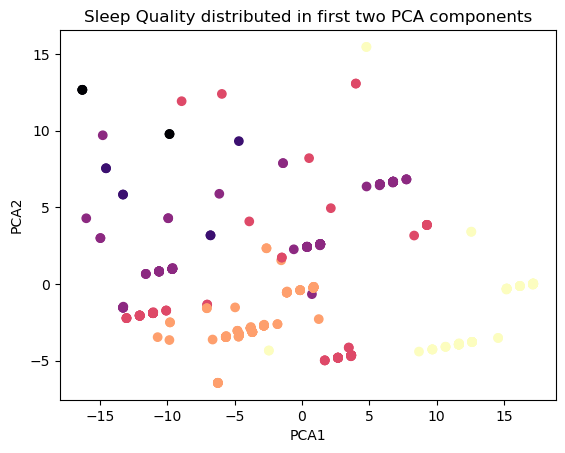

In [37]:
plt.scatter(X_trans_pca[0], X_trans_pca[1], c=normalized_quality)
plt.magma()
plt.title('Sleep Quality distributed in first two PCA components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('../graphics/PCA_Vis.png')
plt.show()

In [36]:
print(f"Info shown in PCA: {(e_vals[:2].sum() / e_vals.sum())*100:.2f}%")

Info shown in PCA: 97.60%
